In [118]:
import pandas as pd
import numpy as np

In [119]:
df = pd.read_excel('Online Retail.xlsx')

In [120]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [121]:
df.shape

(541909, 8)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [123]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Cleaning

In [124]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [125]:
# Drop Description, CustomerID, InvoiceNo and StockCode columns
df.drop(['Description', 'InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Quantity   541909 non-null  int64  
 1   UnitPrice  541909 non-null  float64
 2   Country    541909 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 12.4+ MB


In [126]:
# Drop rows with negative Quantity
df = df[df['Quantity'] > 0]

In [127]:
# Drop rows with negative UnitPrice
df = df[df['UnitPrice'] > 0]

In [128]:
# Remove outliers in Quantity
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1 
df = df[(df['Quantity'] >= (Q1 - 1.5 * IQR)) & (df['Quantity'] <= (Q3 + 1.5 * IQR))]

In [129]:
# Remove outliers in UnitPrice
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['UnitPrice'] >= (Q1 - 1.5 * IQR)) & (df['UnitPrice'] <= (Q3 + 1.5 * IQR))]

In [130]:
df.describe()

,Quantity,UnitPrice
count,442666.000000,442666.000000
mean,4.904070,2.784289
std,4.495069,2.036175
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,8.000000,3.750000
max,23.000000,8.500000


## Feature Engineering

In [131]:
# Creating Total_Price column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [132]:
df.head()

,Quantity,UnitPrice,Country,TotalPrice
0,6,2.55,United Kingdom,15.30
1,6,3.39,United Kingdom,20.34
2,8,2.75,United Kingdom,22.00
3,6,3.39,United Kingdom,20.34
4,6,3.39,United Kingdom,20.34


## EDA

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

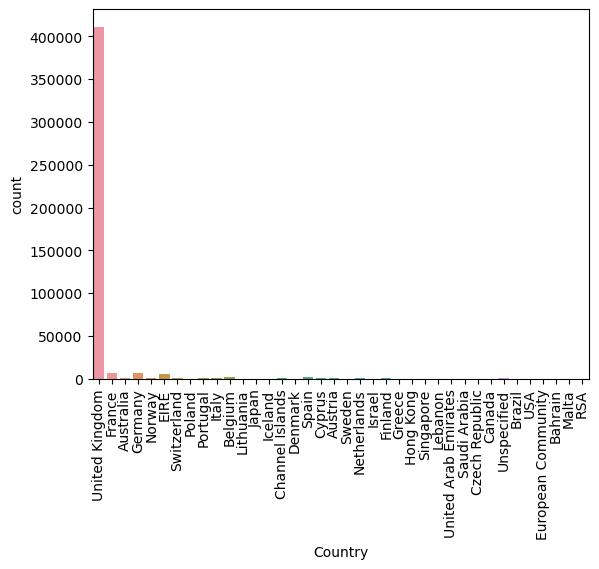

In [134]:
sns.countplot(df, x=df['Country'])
plt.xticks(rotation=90)
plt.show()

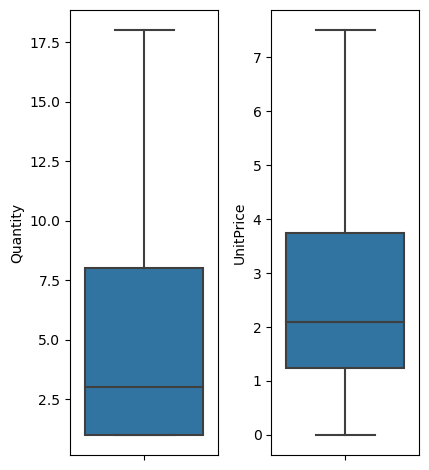

In [135]:
# Boxplot of quantity and unitprice
plt.subplot(1, 3, 1)
sns.boxplot(y='Quantity', data=df, showfliers=False)

plt.subplot(1, 3, 2)
sns.boxplot(y='UnitPrice', data=df, showfliers=False)

plt.tight_layout()

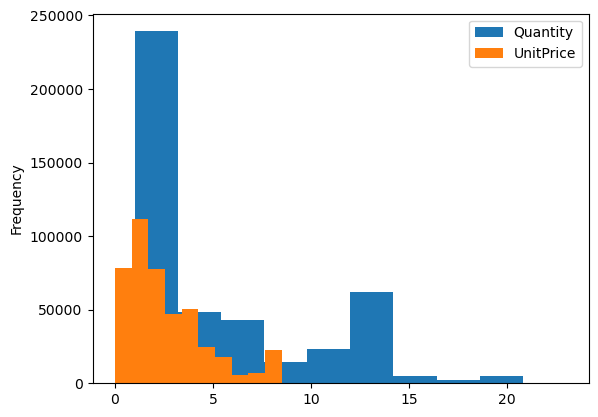

In [137]:
# Histogram of Quantity and UnitPrice
df['Quantity'].plot(kind='hist')
df['UnitPrice'].plot(kind='hist')

plt.legend(['Quantity', 'UnitPrice'])


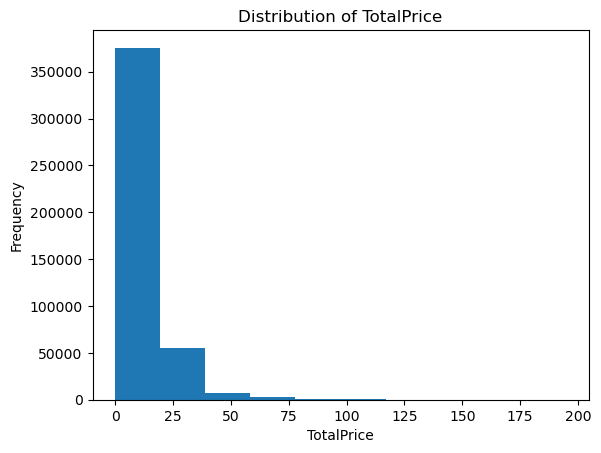

In [138]:
df['TotalPrice'].plot(kind='hist')
plt.title('Distribution of TotalPrice')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')
plt.show()

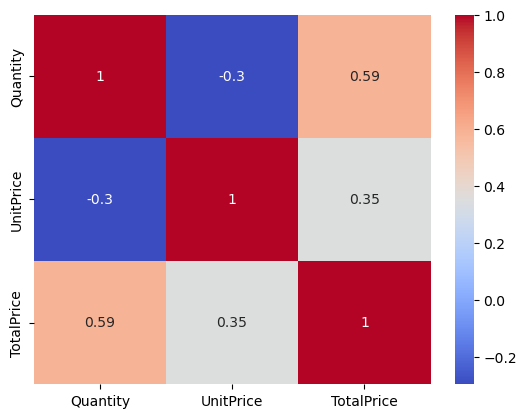

In [139]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Preprocessing

In [140]:
# Encode the Country column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Country'] = encoder.fit_transform(df['Country'])

In [141]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

## Clustering

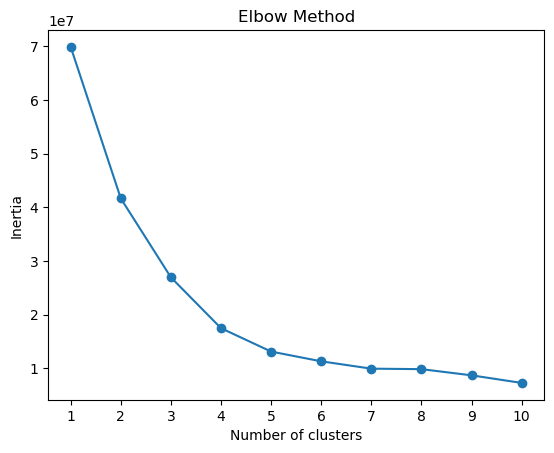

In [142]:
# K-Means Clustering
from sklearn.cluster import KMeans


# Find the best number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(train)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

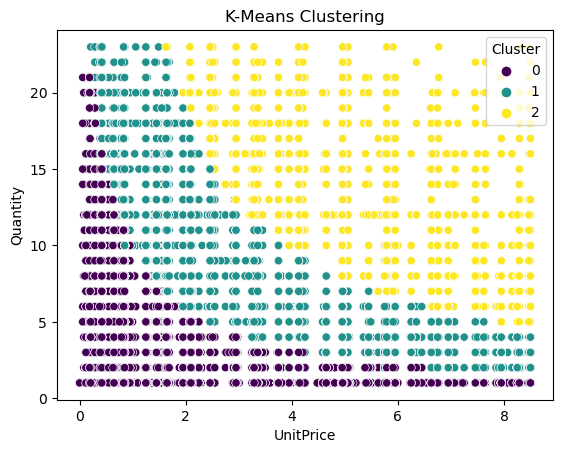

In [154]:
# Fit the model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
train['Cluster'] = kmeans.fit_predict(train)

# Visualize the clusters
sns.scatterplot(x='UnitPrice', y='Quantity', hue='Cluster', data=train, palette='viridis')
plt.title('K-Means Clustering')
plt.show()